In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sn
plt.style.use('seaborn')


import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.metrics import f1_score, plot_roc_curve


Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex

Age	Age in years

sibsp	# of siblings / spouses aboard the Titanic

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# Load the data

In [2]:
df = pd.read_csv('train.csv')

In [3]:
# Information about the data

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Understanding the data

In [9]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
df.corr()['Survived'].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

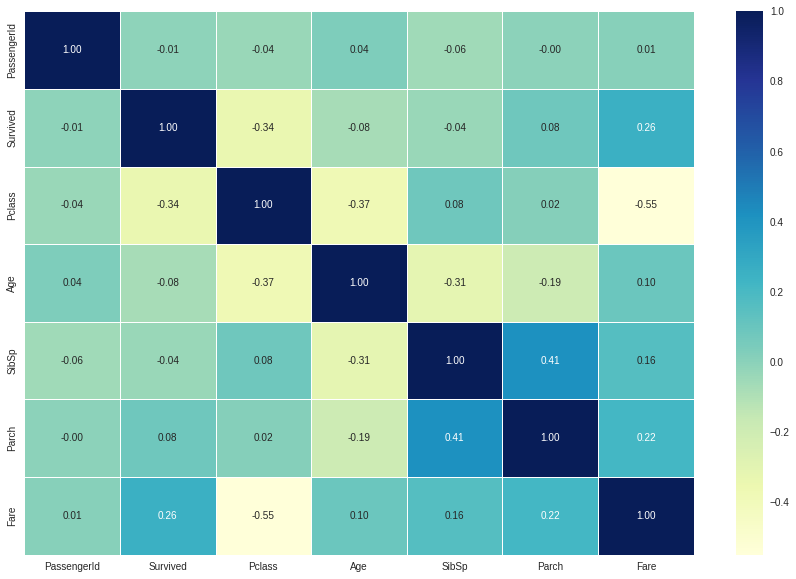

In [11]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sn.heatmap(corr_matrix, annot = True, linewidths=0.5, fmt = '.2f', cmap = 'YlGnBu');


## Visualize the data

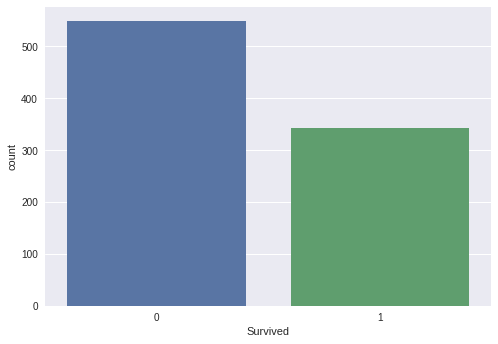

In [12]:
sn.countplot(x = 'Survived', data = df);

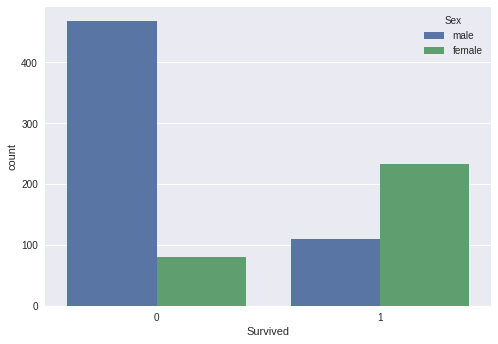

In [13]:
sn.countplot(x = 'Survived', hue = 'Sex', data = df );

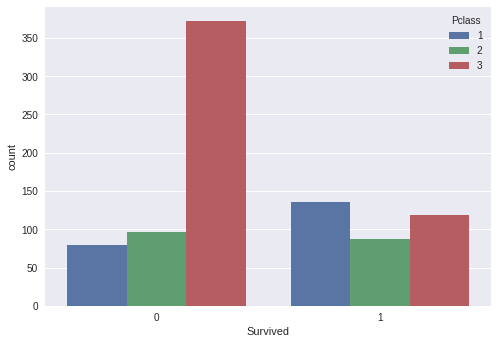

In [14]:
sn.countplot(x = 'Survived', hue = 'Pclass', data = df);

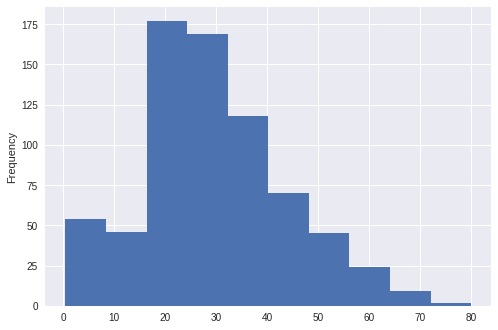

In [15]:
df["Age"].plot.hist();

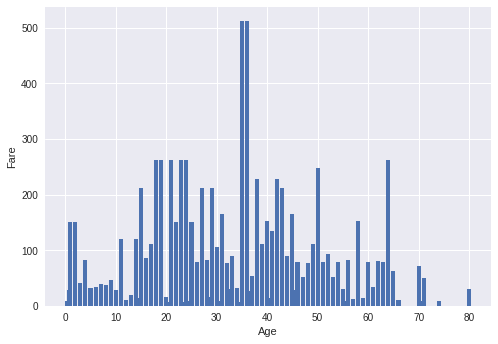

In [16]:
fig, ax = plt.subplots()
ax.bar(df.Age, df.Fare)
ax.set_xlabel('Age')
ax.set_ylabel('Fare');

# Start the processing

## We do not consider the Name and the Ticket

In [17]:
X = df.drop(['Name', 'Ticket', 'Cabin', 'Survived','PassengerId'], axis = 1)
y = df['Survived']

In [18]:
X.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [19]:
X['Age'].fillna(int(X['Age'].mean()), inplace = True)

In [20]:
X['Embarked'].fillna('U', inplace = True)

In [21]:
X.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

## Encoding

In [22]:
one_hot = OneHotEncoder()
categorical_features = ['Sex', 'Embarked']
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X


array([[ 0.    ,  1.    ,  0.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 71.2833],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  2.    , 23.45  ],
       [ 0.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ]])

## Normalization

In [23]:
X_norm = StandardScaler().fit(transformed_X).transform(transformed_X.astype(float))

## Metrics

In [24]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    print('Accuracy: {:3.3f} %'.format(accuracy))
    print('precision: {:3.3f} %'.format(precision))
    print('Recall: {:3.3f} %'.format(recall))
    print('F1: {:3.3f} %'.format(f1))


## Fit the data
### train_test_split

In [26]:
X_train, X_test, y_train ,y_test = train_test_split(X_norm, y, test_size = 0.2)

In [25]:
models = {'Logistic_Regression':LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random_Forest_Classifier':RandomForestClassifier(),
         'GradientBoostClassifier': GradientBoostingClassifier(),
         'XGBClassifier':XGBClassifier(),
         'CatBoostClassifier':CatBoostClassifier(),
          'LGBMClassifier':LGBMClassifier()}




In [26]:
def fit_and_score(models, X, y):
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [27]:
model_scores = fit_and_score(models, X_norm, y)
model_scores

[10:46:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.008911
0:	learn: 0.6870845	total: 62.4ms	remaining: 1m 2s
1:	learn: 0.6813343	total: 63.8ms	remaining: 31.8s
2:	learn: 0.6759070	total: 65.7ms	remaining: 21.8s
3:	learn: 0.6700571	total: 67.6ms	remaining: 16.8s
4:	learn: 0.6650329	total: 69.2ms	remaining: 13.8s
5:	learn: 0.6598985	total: 71ms	remaining: 11.8s
6:	learn: 0.6549488	total: 72ms	remaining: 10.2s
7:	learn: 0.6492993	total: 77ms	remaining: 9.55s
8:	learn: 0.6442950	total: 78.2ms	remaining: 8.61s
9:	learn: 0.6399675	total: 78.6ms	remaining: 7.78s
10:	learn: 0.6343657	total: 82.7ms	remaining: 7.44s
11:	learn: 0.6291245	total: 84.4ms	remaining: 6.95s
12:	learn: 0.6244549	total: 85.9ms	remaining: 

309:	learn: 0.3622980	total: 327ms	remaining: 729ms
310:	learn: 0.3620933	total: 328ms	remaining: 727ms
311:	learn: 0.3619524	total: 329ms	remaining: 725ms
312:	learn: 0.3618191	total: 330ms	remaining: 723ms
313:	learn: 0.3615762	total: 330ms	remaining: 721ms
314:	learn: 0.3614320	total: 331ms	remaining: 720ms
315:	learn: 0.3613538	total: 331ms	remaining: 717ms
316:	learn: 0.3610355	total: 332ms	remaining: 715ms
317:	learn: 0.3608002	total: 333ms	remaining: 714ms
318:	learn: 0.3606536	total: 333ms	remaining: 712ms
319:	learn: 0.3604136	total: 334ms	remaining: 710ms
320:	learn: 0.3602790	total: 335ms	remaining: 708ms
321:	learn: 0.3601698	total: 336ms	remaining: 707ms
322:	learn: 0.3599675	total: 336ms	remaining: 705ms
323:	learn: 0.3598727	total: 337ms	remaining: 703ms
324:	learn: 0.3596090	total: 338ms	remaining: 701ms
325:	learn: 0.3596019	total: 338ms	remaining: 699ms
326:	learn: 0.3593097	total: 339ms	remaining: 697ms
327:	learn: 0.3591986	total: 339ms	remaining: 695ms
328:	learn: 

579:	learn: 0.3289389	total: 523ms	remaining: 378ms
580:	learn: 0.3289037	total: 523ms	remaining: 378ms
581:	learn: 0.3288003	total: 524ms	remaining: 377ms
582:	learn: 0.3287149	total: 525ms	remaining: 376ms
583:	learn: 0.3286071	total: 526ms	remaining: 375ms
584:	learn: 0.3284678	total: 527ms	remaining: 374ms
585:	learn: 0.3283363	total: 527ms	remaining: 373ms
586:	learn: 0.3280059	total: 528ms	remaining: 372ms
587:	learn: 0.3279043	total: 529ms	remaining: 371ms
588:	learn: 0.3278329	total: 530ms	remaining: 370ms
589:	learn: 0.3276936	total: 530ms	remaining: 369ms
590:	learn: 0.3276282	total: 531ms	remaining: 368ms
591:	learn: 0.3274816	total: 532ms	remaining: 367ms
592:	learn: 0.3274473	total: 533ms	remaining: 366ms
593:	learn: 0.3274253	total: 533ms	remaining: 365ms
594:	learn: 0.3273942	total: 534ms	remaining: 364ms
595:	learn: 0.3273755	total: 535ms	remaining: 363ms
596:	learn: 0.3272419	total: 536ms	remaining: 362ms
597:	learn: 0.3271096	total: 536ms	remaining: 361ms
598:	learn: 

822:	learn: 0.3021221	total: 707ms	remaining: 152ms
823:	learn: 0.3020049	total: 708ms	remaining: 151ms
824:	learn: 0.3018888	total: 709ms	remaining: 150ms
825:	learn: 0.3017211	total: 709ms	remaining: 149ms
826:	learn: 0.3016503	total: 710ms	remaining: 149ms
827:	learn: 0.3015319	total: 711ms	remaining: 148ms
828:	learn: 0.3014621	total: 712ms	remaining: 147ms
829:	learn: 0.3012561	total: 712ms	remaining: 146ms
830:	learn: 0.3010424	total: 713ms	remaining: 145ms
831:	learn: 0.3009798	total: 714ms	remaining: 144ms
832:	learn: 0.3007663	total: 715ms	remaining: 143ms
833:	learn: 0.3006275	total: 715ms	remaining: 142ms
834:	learn: 0.3004933	total: 716ms	remaining: 142ms
835:	learn: 0.3004425	total: 717ms	remaining: 141ms
836:	learn: 0.3003789	total: 718ms	remaining: 140ms
837:	learn: 0.3003744	total: 718ms	remaining: 139ms
838:	learn: 0.3002080	total: 719ms	remaining: 138ms
839:	learn: 0.3000155	total: 720ms	remaining: 137ms
840:	learn: 0.2997300	total: 720ms	remaining: 136ms
841:	learn: 

{'Logistic_Regression': 0.8100558659217877,
 'KNN': 0.7988826815642458,
 'Random_Forest_Classifier': 0.8156424581005587,
 'GradientBoostClassifier': 0.8100558659217877,
 'XGBClassifier': 0.8044692737430168,
 'CatBoostClassifier': 0.8268156424581006,
 'LGBMClassifier': 0.8156424581005587}

### cross_val

In [28]:
def fit_and_score_cvs(models, X, y):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model_scores[name] = np.mean(cross_val_score(model, X, y, cv = 5))
    return model_scores

In [29]:
fit_and_score_cvs(models, X_norm, y)

[10:46:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:15] WARNING: /tmp/abs_40obctay9q/croots/recip

170:	learn: 0.3913901	total: 169ms	remaining: 822ms
171:	learn: 0.3908892	total: 170ms	remaining: 820ms
172:	learn: 0.3904800	total: 171ms	remaining: 818ms
173:	learn: 0.3901720	total: 172ms	remaining: 816ms
174:	learn: 0.3895273	total: 173ms	remaining: 813ms
175:	learn: 0.3892377	total: 173ms	remaining: 811ms
176:	learn: 0.3890160	total: 174ms	remaining: 809ms
177:	learn: 0.3885497	total: 175ms	remaining: 807ms
178:	learn: 0.3879655	total: 176ms	remaining: 805ms
179:	learn: 0.3874799	total: 176ms	remaining: 803ms
180:	learn: 0.3869476	total: 177ms	remaining: 801ms
181:	learn: 0.3866283	total: 178ms	remaining: 800ms
182:	learn: 0.3862706	total: 179ms	remaining: 798ms
183:	learn: 0.3859104	total: 179ms	remaining: 796ms
184:	learn: 0.3856275	total: 180ms	remaining: 794ms
185:	learn: 0.3851291	total: 181ms	remaining: 792ms
186:	learn: 0.3846137	total: 182ms	remaining: 790ms
187:	learn: 0.3842232	total: 182ms	remaining: 788ms
188:	learn: 0.3837057	total: 183ms	remaining: 786ms
189:	learn: 

417:	learn: 0.3392352	total: 353ms	remaining: 492ms
418:	learn: 0.3391803	total: 354ms	remaining: 491ms
419:	learn: 0.3389100	total: 355ms	remaining: 490ms
420:	learn: 0.3386911	total: 356ms	remaining: 489ms
421:	learn: 0.3385926	total: 356ms	remaining: 488ms
422:	learn: 0.3383233	total: 357ms	remaining: 487ms
423:	learn: 0.3382507	total: 358ms	remaining: 486ms
424:	learn: 0.3382405	total: 358ms	remaining: 485ms
425:	learn: 0.3381277	total: 359ms	remaining: 484ms
426:	learn: 0.3379313	total: 360ms	remaining: 483ms
427:	learn: 0.3378296	total: 361ms	remaining: 482ms
428:	learn: 0.3377625	total: 361ms	remaining: 481ms
429:	learn: 0.3375809	total: 362ms	remaining: 480ms
430:	learn: 0.3373372	total: 363ms	remaining: 479ms
431:	learn: 0.3372461	total: 364ms	remaining: 478ms
432:	learn: 0.3371150	total: 365ms	remaining: 477ms
433:	learn: 0.3370467	total: 365ms	remaining: 476ms
434:	learn: 0.3369935	total: 366ms	remaining: 475ms
435:	learn: 0.3367673	total: 367ms	remaining: 475ms
436:	learn: 

668:	learn: 0.3100508	total: 539ms	remaining: 267ms
669:	learn: 0.3098286	total: 540ms	remaining: 266ms
670:	learn: 0.3097660	total: 540ms	remaining: 265ms
671:	learn: 0.3097546	total: 541ms	remaining: 264ms
672:	learn: 0.3095307	total: 542ms	remaining: 263ms
673:	learn: 0.3094717	total: 542ms	remaining: 262ms
674:	learn: 0.3093560	total: 543ms	remaining: 261ms
675:	learn: 0.3091906	total: 544ms	remaining: 261ms
676:	learn: 0.3090251	total: 544ms	remaining: 260ms
677:	learn: 0.3089579	total: 545ms	remaining: 259ms
678:	learn: 0.3088177	total: 546ms	remaining: 258ms
679:	learn: 0.3085580	total: 547ms	remaining: 257ms
680:	learn: 0.3083804	total: 548ms	remaining: 257ms
681:	learn: 0.3082375	total: 548ms	remaining: 256ms
682:	learn: 0.3082102	total: 549ms	remaining: 255ms
683:	learn: 0.3081436	total: 550ms	remaining: 254ms
684:	learn: 0.3080952	total: 550ms	remaining: 253ms
685:	learn: 0.3079085	total: 551ms	remaining: 252ms
686:	learn: 0.3078783	total: 552ms	remaining: 251ms
687:	learn: 

901:	learn: 0.2845035	total: 724ms	remaining: 78.7ms
902:	learn: 0.2844436	total: 725ms	remaining: 77.8ms
903:	learn: 0.2843127	total: 726ms	remaining: 77.1ms
904:	learn: 0.2842879	total: 726ms	remaining: 76.3ms
905:	learn: 0.2841711	total: 727ms	remaining: 75.5ms
906:	learn: 0.2839743	total: 728ms	remaining: 74.7ms
907:	learn: 0.2838176	total: 729ms	remaining: 73.9ms
908:	learn: 0.2837210	total: 730ms	remaining: 73.1ms
909:	learn: 0.2836299	total: 731ms	remaining: 72.3ms
910:	learn: 0.2835278	total: 732ms	remaining: 71.5ms
911:	learn: 0.2832960	total: 732ms	remaining: 70.7ms
912:	learn: 0.2830720	total: 733ms	remaining: 69.9ms
913:	learn: 0.2829028	total: 734ms	remaining: 69ms
914:	learn: 0.2828293	total: 735ms	remaining: 68.2ms
915:	learn: 0.2827362	total: 735ms	remaining: 67.4ms
916:	learn: 0.2826729	total: 736ms	remaining: 66.6ms
917:	learn: 0.2825748	total: 737ms	remaining: 65.8ms
918:	learn: 0.2825279	total: 738ms	remaining: 65ms
919:	learn: 0.2824567	total: 738ms	remaining: 64.2

118:	learn: 0.4099737	total: 83.1ms	remaining: 615ms
119:	learn: 0.4092563	total: 84ms	remaining: 616ms
120:	learn: 0.4083557	total: 84.9ms	remaining: 617ms
121:	learn: 0.4079462	total: 85.7ms	remaining: 617ms
122:	learn: 0.4069587	total: 86.4ms	remaining: 616ms
123:	learn: 0.4062381	total: 87.2ms	remaining: 616ms
124:	learn: 0.4053976	total: 88ms	remaining: 616ms
125:	learn: 0.4045086	total: 88.8ms	remaining: 616ms
126:	learn: 0.4040175	total: 89.5ms	remaining: 615ms
127:	learn: 0.4033934	total: 90.3ms	remaining: 615ms
128:	learn: 0.4026012	total: 91.4ms	remaining: 617ms
129:	learn: 0.4019389	total: 92.2ms	remaining: 617ms
130:	learn: 0.4012011	total: 92.9ms	remaining: 617ms
131:	learn: 0.4003022	total: 93.7ms	remaining: 616ms
132:	learn: 0.3993487	total: 94.5ms	remaining: 616ms
133:	learn: 0.3988939	total: 95.2ms	remaining: 615ms
134:	learn: 0.3981932	total: 96ms	remaining: 615ms
135:	learn: 0.3973010	total: 96.8ms	remaining: 615ms
136:	learn: 0.3966691	total: 98.9ms	remaining: 623ms

366:	learn: 0.3281467	total: 267ms	remaining: 461ms
367:	learn: 0.3280277	total: 268ms	remaining: 460ms
368:	learn: 0.3278243	total: 269ms	remaining: 460ms
369:	learn: 0.3275492	total: 270ms	remaining: 459ms
370:	learn: 0.3273883	total: 270ms	remaining: 458ms
371:	learn: 0.3272161	total: 271ms	remaining: 458ms
372:	learn: 0.3271764	total: 272ms	remaining: 457ms
373:	learn: 0.3269941	total: 272ms	remaining: 456ms
374:	learn: 0.3267852	total: 273ms	remaining: 455ms
375:	learn: 0.3265764	total: 274ms	remaining: 455ms
376:	learn: 0.3264558	total: 275ms	remaining: 454ms
377:	learn: 0.3262619	total: 275ms	remaining: 453ms
378:	learn: 0.3260996	total: 276ms	remaining: 453ms
379:	learn: 0.3259060	total: 277ms	remaining: 452ms
380:	learn: 0.3255234	total: 278ms	remaining: 451ms
381:	learn: 0.3253606	total: 278ms	remaining: 451ms
382:	learn: 0.3251328	total: 279ms	remaining: 450ms
383:	learn: 0.3249274	total: 280ms	remaining: 449ms
384:	learn: 0.3247891	total: 281ms	remaining: 448ms
385:	learn: 

618:	learn: 0.2955622	total: 453ms	remaining: 279ms
619:	learn: 0.2953507	total: 454ms	remaining: 278ms
620:	learn: 0.2952240	total: 455ms	remaining: 278ms
621:	learn: 0.2952226	total: 456ms	remaining: 277ms
622:	learn: 0.2950137	total: 456ms	remaining: 276ms
623:	learn: 0.2949225	total: 457ms	remaining: 275ms
624:	learn: 0.2948134	total: 458ms	remaining: 275ms
625:	learn: 0.2946942	total: 459ms	remaining: 274ms
626:	learn: 0.2945698	total: 459ms	remaining: 273ms
627:	learn: 0.2944973	total: 460ms	remaining: 272ms
628:	learn: 0.2944470	total: 461ms	remaining: 272ms
629:	learn: 0.2943644	total: 461ms	remaining: 271ms
630:	learn: 0.2941557	total: 462ms	remaining: 270ms
631:	learn: 0.2941363	total: 463ms	remaining: 270ms
632:	learn: 0.2940848	total: 464ms	remaining: 269ms
633:	learn: 0.2938945	total: 464ms	remaining: 268ms
634:	learn: 0.2937066	total: 465ms	remaining: 267ms
635:	learn: 0.2935739	total: 466ms	remaining: 267ms
636:	learn: 0.2933924	total: 467ms	remaining: 266ms
637:	learn: 

868:	learn: 0.2685459	total: 639ms	remaining: 96.3ms
869:	learn: 0.2684134	total: 640ms	remaining: 95.7ms
870:	learn: 0.2683031	total: 641ms	remaining: 95ms
871:	learn: 0.2681748	total: 642ms	remaining: 94.2ms
872:	learn: 0.2681087	total: 643ms	remaining: 93.5ms
873:	learn: 0.2680859	total: 643ms	remaining: 92.7ms
874:	learn: 0.2679608	total: 644ms	remaining: 92ms
875:	learn: 0.2678392	total: 645ms	remaining: 91.3ms
876:	learn: 0.2677219	total: 646ms	remaining: 90.5ms
877:	learn: 0.2675368	total: 646ms	remaining: 89.8ms
878:	learn: 0.2675034	total: 647ms	remaining: 89.1ms
879:	learn: 0.2671721	total: 648ms	remaining: 88.3ms
880:	learn: 0.2670065	total: 648ms	remaining: 87.6ms
881:	learn: 0.2668058	total: 649ms	remaining: 86.8ms
882:	learn: 0.2666856	total: 650ms	remaining: 86.1ms
883:	learn: 0.2665202	total: 651ms	remaining: 85.4ms
884:	learn: 0.2662817	total: 651ms	remaining: 84.6ms
885:	learn: 0.2662161	total: 652ms	remaining: 83.9ms
886:	learn: 0.2661710	total: 653ms	remaining: 83.1

100:	learn: 0.4444778	total: 77.9ms	remaining: 693ms
101:	learn: 0.4433115	total: 78.8ms	remaining: 694ms
102:	learn: 0.4420524	total: 79.6ms	remaining: 694ms
103:	learn: 0.4407120	total: 80.4ms	remaining: 693ms
104:	learn: 0.4399064	total: 81.1ms	remaining: 691ms
105:	learn: 0.4388645	total: 81.9ms	remaining: 691ms
106:	learn: 0.4378227	total: 82.6ms	remaining: 690ms
107:	learn: 0.4366439	total: 83.4ms	remaining: 689ms
108:	learn: 0.4358383	total: 84.2ms	remaining: 688ms
109:	learn: 0.4346373	total: 85ms	remaining: 688ms
110:	learn: 0.4336824	total: 85.9ms	remaining: 688ms
111:	learn: 0.4331305	total: 86.5ms	remaining: 686ms
112:	learn: 0.4326405	total: 87.2ms	remaining: 684ms
113:	learn: 0.4317599	total: 87.8ms	remaining: 682ms
114:	learn: 0.4308426	total: 88.4ms	remaining: 681ms
115:	learn: 0.4302704	total: 89.2ms	remaining: 680ms
116:	learn: 0.4300040	total: 89.6ms	remaining: 676ms
117:	learn: 0.4292021	total: 90.4ms	remaining: 676ms
118:	learn: 0.4288924	total: 90.9ms	remaining: 6

358:	learn: 0.3582329	total: 262ms	remaining: 467ms
359:	learn: 0.3581062	total: 262ms	remaining: 467ms
360:	learn: 0.3578893	total: 263ms	remaining: 466ms
361:	learn: 0.3577239	total: 264ms	remaining: 465ms
362:	learn: 0.3574937	total: 265ms	remaining: 465ms
363:	learn: 0.3572404	total: 266ms	remaining: 464ms
364:	learn: 0.3572330	total: 266ms	remaining: 463ms
365:	learn: 0.3571882	total: 267ms	remaining: 462ms
366:	learn: 0.3571643	total: 267ms	remaining: 461ms
367:	learn: 0.3569953	total: 268ms	remaining: 461ms
368:	learn: 0.3568521	total: 269ms	remaining: 460ms
369:	learn: 0.3566885	total: 270ms	remaining: 459ms
370:	learn: 0.3565921	total: 270ms	remaining: 459ms
371:	learn: 0.3564715	total: 271ms	remaining: 458ms
372:	learn: 0.3564676	total: 272ms	remaining: 457ms
373:	learn: 0.3563726	total: 272ms	remaining: 456ms
374:	learn: 0.3561018	total: 273ms	remaining: 455ms
375:	learn: 0.3559156	total: 274ms	remaining: 454ms
376:	learn: 0.3557502	total: 275ms	remaining: 454ms
377:	learn: 

639:	learn: 0.3252943	total: 458ms	remaining: 258ms
640:	learn: 0.3251485	total: 460ms	remaining: 258ms
641:	learn: 0.3250965	total: 461ms	remaining: 257ms
642:	learn: 0.3250421	total: 462ms	remaining: 257ms
643:	learn: 0.3248551	total: 463ms	remaining: 256ms
644:	learn: 0.3247330	total: 463ms	remaining: 255ms
645:	learn: 0.3246702	total: 464ms	remaining: 254ms
646:	learn: 0.3245857	total: 465ms	remaining: 254ms
647:	learn: 0.3245351	total: 466ms	remaining: 253ms
648:	learn: 0.3244556	total: 466ms	remaining: 252ms
649:	learn: 0.3243006	total: 467ms	remaining: 252ms
650:	learn: 0.3242077	total: 468ms	remaining: 251ms
651:	learn: 0.3241375	total: 469ms	remaining: 250ms
652:	learn: 0.3241068	total: 469ms	remaining: 249ms
653:	learn: 0.3239346	total: 470ms	remaining: 249ms
654:	learn: 0.3239346	total: 470ms	remaining: 248ms
655:	learn: 0.3238519	total: 471ms	remaining: 247ms
656:	learn: 0.3237356	total: 472ms	remaining: 246ms
657:	learn: 0.3234713	total: 473ms	remaining: 246ms
658:	learn: 

913:	learn: 0.2980357	total: 662ms	remaining: 62.3ms
914:	learn: 0.2978820	total: 663ms	remaining: 61.6ms
915:	learn: 0.2977383	total: 664ms	remaining: 60.9ms
916:	learn: 0.2975134	total: 665ms	remaining: 60.2ms
917:	learn: 0.2974965	total: 665ms	remaining: 59.4ms
918:	learn: 0.2974663	total: 666ms	remaining: 58.7ms
919:	learn: 0.2974532	total: 667ms	remaining: 58ms
920:	learn: 0.2974107	total: 668ms	remaining: 57.3ms
921:	learn: 0.2972516	total: 668ms	remaining: 56.5ms
922:	learn: 0.2972153	total: 669ms	remaining: 55.8ms
923:	learn: 0.2970396	total: 670ms	remaining: 55.1ms
924:	learn: 0.2970005	total: 670ms	remaining: 54.4ms
925:	learn: 0.2968666	total: 671ms	remaining: 53.6ms
926:	learn: 0.2967715	total: 672ms	remaining: 52.9ms
927:	learn: 0.2967481	total: 672ms	remaining: 52.2ms
928:	learn: 0.2967018	total: 673ms	remaining: 51.4ms
929:	learn: 0.2966135	total: 674ms	remaining: 50.7ms
930:	learn: 0.2963310	total: 675ms	remaining: 50ms
931:	learn: 0.2962594	total: 675ms	remaining: 49.3

134:	learn: 0.4107034	total: 98.1ms	remaining: 629ms
135:	learn: 0.4099900	total: 98.9ms	remaining: 628ms
136:	learn: 0.4095426	total: 99.8ms	remaining: 629ms
137:	learn: 0.4089649	total: 101ms	remaining: 629ms
138:	learn: 0.4083939	total: 101ms	remaining: 628ms
139:	learn: 0.4079858	total: 102ms	remaining: 627ms
140:	learn: 0.4074537	total: 103ms	remaining: 626ms
141:	learn: 0.4067937	total: 104ms	remaining: 626ms
142:	learn: 0.4060756	total: 104ms	remaining: 625ms
143:	learn: 0.4057078	total: 105ms	remaining: 624ms
144:	learn: 0.4051029	total: 106ms	remaining: 623ms
145:	learn: 0.4047596	total: 106ms	remaining: 622ms
146:	learn: 0.4040632	total: 107ms	remaining: 622ms
147:	learn: 0.4035020	total: 108ms	remaining: 621ms
148:	learn: 0.4030391	total: 109ms	remaining: 620ms
149:	learn: 0.4024329	total: 109ms	remaining: 620ms
150:	learn: 0.4020653	total: 110ms	remaining: 618ms
151:	learn: 0.4013119	total: 111ms	remaining: 617ms
152:	learn: 0.4006477	total: 111ms	remaining: 617ms
153:	lear

391:	learn: 0.3457965	total: 283ms	remaining: 439ms
392:	learn: 0.3457812	total: 284ms	remaining: 438ms
393:	learn: 0.3456144	total: 284ms	remaining: 437ms
394:	learn: 0.3454623	total: 285ms	remaining: 437ms
395:	learn: 0.3451163	total: 287ms	remaining: 438ms
396:	learn: 0.3448614	total: 288ms	remaining: 438ms
397:	learn: 0.3447702	total: 289ms	remaining: 437ms
398:	learn: 0.3445960	total: 290ms	remaining: 437ms
399:	learn: 0.3444597	total: 291ms	remaining: 436ms
400:	learn: 0.3441418	total: 292ms	remaining: 436ms
401:	learn: 0.3439243	total: 292ms	remaining: 435ms
402:	learn: 0.3437099	total: 293ms	remaining: 434ms
403:	learn: 0.3434948	total: 294ms	remaining: 433ms
404:	learn: 0.3434514	total: 294ms	remaining: 432ms
405:	learn: 0.3433226	total: 295ms	remaining: 432ms
406:	learn: 0.3431796	total: 296ms	remaining: 431ms
407:	learn: 0.3430073	total: 297ms	remaining: 431ms
408:	learn: 0.3428853	total: 298ms	remaining: 430ms
409:	learn: 0.3428061	total: 298ms	remaining: 429ms
410:	learn: 

637:	learn: 0.3147559	total: 464ms	remaining: 263ms
638:	learn: 0.3146597	total: 464ms	remaining: 262ms
639:	learn: 0.3144005	total: 465ms	remaining: 262ms
640:	learn: 0.3143350	total: 466ms	remaining: 261ms
641:	learn: 0.3142583	total: 467ms	remaining: 260ms
642:	learn: 0.3142160	total: 467ms	remaining: 259ms
643:	learn: 0.3141167	total: 468ms	remaining: 259ms
644:	learn: 0.3140552	total: 469ms	remaining: 258ms
645:	learn: 0.3138898	total: 469ms	remaining: 257ms
646:	learn: 0.3138896	total: 470ms	remaining: 256ms
647:	learn: 0.3137881	total: 471ms	remaining: 256ms
648:	learn: 0.3137159	total: 471ms	remaining: 255ms
649:	learn: 0.3135095	total: 472ms	remaining: 254ms
650:	learn: 0.3134507	total: 473ms	remaining: 253ms
651:	learn: 0.3133166	total: 473ms	remaining: 253ms
652:	learn: 0.3132491	total: 474ms	remaining: 252ms
653:	learn: 0.3131877	total: 475ms	remaining: 251ms
654:	learn: 0.3131318	total: 476ms	remaining: 251ms
655:	learn: 0.3131068	total: 476ms	remaining: 250ms
656:	learn: 

882:	learn: 0.2881279	total: 649ms	remaining: 85.9ms
883:	learn: 0.2879148	total: 649ms	remaining: 85.2ms
884:	learn: 0.2878470	total: 650ms	remaining: 84.5ms
885:	learn: 0.2877491	total: 651ms	remaining: 83.7ms
886:	learn: 0.2877160	total: 652ms	remaining: 83ms
887:	learn: 0.2875788	total: 652ms	remaining: 82.3ms
888:	learn: 0.2875542	total: 653ms	remaining: 81.5ms
889:	learn: 0.2874373	total: 654ms	remaining: 80.8ms
890:	learn: 0.2873783	total: 655ms	remaining: 80.1ms
891:	learn: 0.2872989	total: 655ms	remaining: 79.3ms
892:	learn: 0.2871857	total: 656ms	remaining: 78.6ms
893:	learn: 0.2870943	total: 657ms	remaining: 77.9ms
894:	learn: 0.2870501	total: 657ms	remaining: 77.1ms
895:	learn: 0.2869222	total: 658ms	remaining: 76.4ms
896:	learn: 0.2867189	total: 659ms	remaining: 75.7ms
897:	learn: 0.2866097	total: 660ms	remaining: 74.9ms
898:	learn: 0.2864362	total: 661ms	remaining: 74.2ms
899:	learn: 0.2863453	total: 661ms	remaining: 73.5ms
900:	learn: 0.2862784	total: 662ms	remaining: 72

102:	learn: 0.4539426	total: 73.7ms	remaining: 642ms
103:	learn: 0.4534573	total: 74.3ms	remaining: 640ms
104:	learn: 0.4526230	total: 74.8ms	remaining: 638ms
105:	learn: 0.4514333	total: 75.7ms	remaining: 639ms
106:	learn: 0.4504176	total: 76.4ms	remaining: 638ms
107:	learn: 0.4495468	total: 77.2ms	remaining: 637ms
108:	learn: 0.4485222	total: 77.9ms	remaining: 637ms
109:	learn: 0.4475941	total: 78.6ms	remaining: 636ms
110:	learn: 0.4467535	total: 79.3ms	remaining: 635ms
111:	learn: 0.4458421	total: 80.1ms	remaining: 635ms
112:	learn: 0.4454903	total: 80.6ms	remaining: 633ms
113:	learn: 0.4444849	total: 88.3ms	remaining: 686ms
114:	learn: 0.4435769	total: 90.2ms	remaining: 694ms
115:	learn: 0.4431070	total: 90.8ms	remaining: 692ms
116:	learn: 0.4423928	total: 91.5ms	remaining: 691ms
117:	learn: 0.4417288	total: 92.3ms	remaining: 690ms
118:	learn: 0.4409499	total: 93ms	remaining: 689ms
119:	learn: 0.4400124	total: 93.8ms	remaining: 688ms
120:	learn: 0.4392613	total: 95.4ms	remaining: 6

345:	learn: 0.3710051	total: 260ms	remaining: 492ms
346:	learn: 0.3708942	total: 261ms	remaining: 491ms
347:	learn: 0.3706866	total: 262ms	remaining: 491ms
348:	learn: 0.3704287	total: 263ms	remaining: 490ms
349:	learn: 0.3701631	total: 265ms	remaining: 492ms
350:	learn: 0.3699934	total: 266ms	remaining: 492ms
351:	learn: 0.3698092	total: 267ms	remaining: 491ms
352:	learn: 0.3695200	total: 267ms	remaining: 490ms
353:	learn: 0.3692547	total: 268ms	remaining: 489ms
354:	learn: 0.3690838	total: 269ms	remaining: 488ms
355:	learn: 0.3690781	total: 269ms	remaining: 487ms
356:	learn: 0.3688535	total: 270ms	remaining: 486ms
357:	learn: 0.3685282	total: 271ms	remaining: 485ms
358:	learn: 0.3682857	total: 271ms	remaining: 484ms
359:	learn: 0.3681846	total: 272ms	remaining: 484ms
360:	learn: 0.3680665	total: 273ms	remaining: 483ms
361:	learn: 0.3678789	total: 273ms	remaining: 482ms
362:	learn: 0.3676726	total: 274ms	remaining: 481ms
363:	learn: 0.3675201	total: 275ms	remaining: 480ms
364:	learn: 

602:	learn: 0.3373262	total: 445ms	remaining: 293ms
603:	learn: 0.3371762	total: 446ms	remaining: 292ms
604:	learn: 0.3369953	total: 446ms	remaining: 291ms
605:	learn: 0.3368609	total: 447ms	remaining: 291ms
606:	learn: 0.3366889	total: 448ms	remaining: 290ms
607:	learn: 0.3365383	total: 448ms	remaining: 289ms
608:	learn: 0.3364668	total: 449ms	remaining: 288ms
609:	learn: 0.3363620	total: 450ms	remaining: 288ms
610:	learn: 0.3362777	total: 450ms	remaining: 287ms
611:	learn: 0.3360492	total: 451ms	remaining: 286ms
612:	learn: 0.3357621	total: 452ms	remaining: 285ms
613:	learn: 0.3356415	total: 452ms	remaining: 284ms
614:	learn: 0.3355958	total: 453ms	remaining: 284ms
615:	learn: 0.3355287	total: 454ms	remaining: 283ms
616:	learn: 0.3353318	total: 454ms	remaining: 282ms
617:	learn: 0.3351962	total: 455ms	remaining: 281ms
618:	learn: 0.3350728	total: 456ms	remaining: 280ms
619:	learn: 0.3349378	total: 456ms	remaining: 280ms
620:	learn: 0.3349190	total: 457ms	remaining: 279ms
621:	learn: 

872:	learn: 0.3087643	total: 646ms	remaining: 94ms
873:	learn: 0.3086429	total: 647ms	remaining: 93.3ms
874:	learn: 0.3085630	total: 648ms	remaining: 92.5ms
875:	learn: 0.3085272	total: 649ms	remaining: 91.8ms
876:	learn: 0.3084393	total: 649ms	remaining: 91.1ms
877:	learn: 0.3082311	total: 650ms	remaining: 90.3ms
878:	learn: 0.3079286	total: 651ms	remaining: 89.6ms
879:	learn: 0.3078243	total: 652ms	remaining: 88.8ms
880:	learn: 0.3076968	total: 652ms	remaining: 88.1ms
881:	learn: 0.3076880	total: 653ms	remaining: 87.4ms
882:	learn: 0.3076605	total: 654ms	remaining: 86.6ms
883:	learn: 0.3076159	total: 655ms	remaining: 85.9ms
884:	learn: 0.3075007	total: 655ms	remaining: 85.1ms
885:	learn: 0.3074405	total: 656ms	remaining: 84.4ms
886:	learn: 0.3073843	total: 657ms	remaining: 83.7ms
887:	learn: 0.3072930	total: 657ms	remaining: 82.9ms
888:	learn: 0.3071522	total: 658ms	remaining: 82.2ms
889:	learn: 0.3070217	total: 659ms	remaining: 81.4ms
890:	learn: 0.3069728	total: 660ms	remaining: 80

{'Logistic_Regression': 0.7856506182913816,
 'KNN': 0.803603038101814,
 'Random_Forest_Classifier': 0.8125980792166217,
 'GradientBoostClassifier': 0.8294269035214361,
 'XGBClassifier': 0.8126043562864854,
 'CatBoostClassifier': 0.8282907538760906,
 'LGBMClassifier': 0.8294269035214363}

## GridSearchCV

In [30]:
#RandomForestClassifier

In [31]:
np.random.seed(42)

grid = {'n_estimators':np.arange(100,1100,100),
       'max_depth':[None, 5, 10, 15, 20],
       'max_features':['sqrt'],        
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2)

clf = RandomForestClassifier()
gs_clf = GridSearchCV(estimator=clf,
                     param_grid=grid,
                     cv =5,
                      verbose =0,
                     n_jobs=-1)
gs_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])})

In [32]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 400}

In [33]:
gs_y_preds = gs_clf.predict(X_test)

In [34]:
precision_score(y_test, gs_y_preds)

0.8

In [35]:
evaluate_preds(y_test, gs_y_preds)

Accuracy: 0.804 %
precision: 0.800 %
Recall: 0.703 %
F1: 0.748 %


In [36]:
print(classification_report(y_test, gs_y_preds))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [37]:
print(confusion_matrix(y_test, gs_y_preds))

[[92 13]
 [22 52]]


In [38]:
# KNeighborsClassifier

In [39]:
np.random.seed(42)

grid_knn = {'n_neighbors':list(range(5,11)),
           'weights':['uniform', 'distance'],
           'leaf_size': list(range(10,60))}
clf_KNN = KNeighborsClassifier()
gs_clf_KNN = GridSearchCV(estimator=clf_KNN, 
                 param_grid=grid_knn,
                         n_jobs=-1)
gs_clf_KNN.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, ...],
                         'n_neighbors': [5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

In [40]:
gs_clf_KNN.best_params_

{'leaf_size': 10, 'n_neighbors': 6, 'weights': 'uniform'}

In [41]:
y_preds_KNN = gs_clf_KNN.predict(X_test)

In [42]:
precision_score(y_test, y_preds_KNN)

0.8225806451612904

In [43]:
evaluate_preds(y_test, y_preds_KNN)

Accuracy: 0.810 %
precision: 0.823 %
Recall: 0.689 %
F1: 0.750 %


In [44]:
print(classification_report(y_test, y_preds_KNN))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [45]:
print(confusion_matrix(y_test, y_preds_KNN))

[[94 11]
 [23 51]]


In [46]:
# LogisticRegression

In [47]:
np.random.seed(42)
grid_lr = {'penalty': ['l1','l2','elasticnet'],
          "C": np.logspace(-4, 4, 30)}
clf_lr = LogisticRegression()
gs_clf_lr = GridSearchCV(estimator=clf_lr, 
                        param_grid=grid_lr,
                        n_jobs= -1)
gs_clf_lr.fit(X_train ,y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [48]:
y_preds_lr = gs_clf_lr.predict(X_test)

In [49]:
precision_score(y_test, y_preds_lr)

0.7571428571428571

In [50]:
evaluate_preds(y_test, y_preds_lr)

Accuracy: 0.788 %
precision: 0.757 %
Recall: 0.716 %
F1: 0.736 %


In [51]:
print(classification_report(y_test, y_preds_lr))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [52]:
print(confusion_matrix(y_test, y_preds_lr))

[[88 17]
 [21 53]]


In [53]:
# GradientBoostingClassifier

In [54]:
np.random.seed(42)

grid_rbc = {'n_estimators': list(range(100,1000,100)),
            'criterion'   : ['friedman_mse', 'squared_error'] }
                                 
                                 
clf_rbc = GradientBoostingClassifier()
gs_clf_gbc = GridSearchCV(estimator=clf_rbc, 
                        param_grid=grid_rbc,
                        n_jobs= -1)
gs_clf_gbc.fit(X_train ,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900]})

In [55]:
y_preds_gbc = gs_clf_gbc.predict(X_test)
precision_score(y_test, y_preds_gbc)

0.8

In [56]:
evaluate_preds(y_test, y_preds_gbc)

Accuracy: 0.821 %
precision: 0.800 %
Recall: 0.757 %
F1: 0.778 %


In [57]:
print(classification_report(y_test, y_preds_gbc))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [58]:
#XGBClassifier

np.random.seed(42)

grid_XGBCL = {'n_estimators':list(range(100,1100,100)),
              'max_depth':[2,4,6,8]}

clf_XGBCL= XGBClassifier()
gs_clf_XGBCL= GridSearchCV(estimator=clf_XGBCL, 
                 param_grid=grid_XGBCL,
                         n_jobs=-1)
gs_clf_XGBCL.fit(X_train,y_train)

/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be remove

/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/

/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/

/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/

/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/

/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/

/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/

/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/

/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/

/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/

/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/

[10:50:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:50:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:50:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:50:30] WARNING: /tmp/abs_40obctay9q/croots/recip

/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/

[10:50:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:50:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:50:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:50:32] WARNING: /tmp/abs_40obctay9q/croots/recip

/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/

[10:50:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:50:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:50:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:50:32] WARNING: /tmp/abs_40obctay9q/croots/recip

/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:50:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:50:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:50:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:50:30] WARNING: /tmp/abs_40obctay9q/croots/recip

/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/

[10:53:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]})

In [89]:
y_preds_XGBCL = gs_clf_XGBCL.predict(X_test)
precision_score(y_test, y_preds_XGBCL)

0.7941176470588235

In [90]:
evaluate_preds(y_test, y_preds_XGBCL)

Accuracy: 0.810 %
precision: 0.794 %
Recall: 0.730 %
F1: 0.761 %


In [91]:
print(classification_report(y_test, y_preds_XGBCL))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [92]:
# LGBMClassifier


In [93]:
#CatBoostClassifier

## Load the test data

In [94]:
df_ = pd.read_csv('test.csv')

In [95]:
df_

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [96]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [97]:
df_.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [98]:
df_.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [99]:
X_ = df_.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis = 1)

In [100]:
X_

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [101]:
X_['Fare'].mean()

35.6271884892086

In [102]:
X_['Age'].mean()

30.272590361445783

In [103]:
X_['Age'].fillna(int(X_['Age'].mean()), inplace = True)

In [104]:
X_['Fare'].fillna(int(X_['Fare'].mean()), inplace = True)

In [105]:
X_.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [106]:
transformer_X_ = transformer.transform(X_)

In [107]:
transformer_X_

array([[ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.8292],
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  0.    ,  7.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  9.6875],
       ...,
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.25  ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  1.    ,  1.    , ...,  1.    ,  1.    , 22.3583]])

In [108]:
X_norm_test = StandardScaler().fit(transformer_X_).transform(transformer_X_.astype(float))


In [109]:
X_norm_test

array([[-0.75592895,  0.75592895, -0.56814154, ..., -0.49947002,
        -0.4002477 , -0.49838008],
       [ 1.32287566, -1.32287566, -0.56814154, ...,  0.61699237,
        -0.4002477 , -0.51324731],
       [-0.75592895,  0.75592895, -0.56814154, ..., -0.49947002,
        -0.4002477 , -0.46506149],
       ...,
       [-0.75592895,  0.75592895, -0.56814154, ..., -0.49947002,
        -0.4002477 , -0.50876491],
       [-0.75592895,  0.75592895, -0.56814154, ..., -0.49947002,
        -0.4002477 , -0.49442122],
       [-0.75592895,  0.75592895,  1.76012477, ...,  0.61699237,
         0.61989583, -0.23787904]])

In [110]:
#=================================================================================================

In [165]:
submission = pd.read_csv('gender_submission.csv', index_col=False, )

submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [166]:
submission.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [167]:
submission.drop('PassengerId', axis = 1, inplace = True)
submission.head()

,Survived
0,0
1,1
2,0
3,0
4,1


# Predictions

In [142]:
#RandomForestClassifier
prediction_RFC = gs_clf.predict(X_norm_test)
result =accuracy_score(submission, prediction_RFC)
result

0.9545454545454546

In [143]:
# KNN
prediction_KNN = gs_clf_KNN.predict(X_norm_test)
accuracy_score(submission, prediction_KNN)

0.8779904306220095

In [144]:
#LogisticRegression
prediction_lr = gs_clf_lr.predict(X_norm_test)
accuracy_score(submission, prediction_lr)

0.9665071770334929

In [145]:
# GradientBoostClassifier
prediction_gbc = gs_clf_gbc.predict(X_norm_test)
accuracy_score(submission, prediction_gbc)

0.8803827751196173

In [146]:
#XGBCL
prediction_XGBCL = gs_clf_XGBCL.predict(X_norm_test)
accuracy_score(submission, prediction_XGBCL)

0.8971291866028708

In [147]:
prediction_XGBCL

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
#save _model

## XGBCL

In [193]:
solution_XGBCL = pd.DataFrame(prediction_XGBCL, columns=['Survived'])
test_for_sub= pd.read_csv('test.csv',index_col=False)

solution_XGBCL_submission = pd.DataFrame()
solution_XGBCL_submission['PassengerId'] = test_for_sub['PassengerId']
solution_XGBCL_submission['Survived'] = solution_XGBCL
solution_XGBCL_submission.to_csv('solution_XGBCL.csv', header = True, index = False)

## RandomForestClassifier

In [194]:
solution_RFC = pd.DataFrame(prediction_RFC, columns=['Survived'])
test_for_sub= pd.read_csv('test.csv',index_col=False)

solution_RFC_submision = pd.DataFrame()
solution_RFC_submision['PassengerId'] = test_for_sub['PassengerId']
solution_RFC_submision['Survived'] = solution_RFC
solution_RFC_submision.to_csv('submission_RFC.csv', header = True, index = False)

## LogisticRegression

In [195]:
solution_lr = pd.DataFrame(prediction_lr, columns=['Survived'])
test_for_sub= pd.read_csv('test.csv',index_col=False)

solution_lr_submision = pd.DataFrame()
solution_lr_submision['PassengerId'] = test_for_sub['PassengerId']
solution_lr_submision['Survived'] = solution_lr
solution_lr_submision.to_csv('submission_LR.csv', header = True, index = False)

## KNN

In [196]:
solution_KNN = pd.DataFrame(prediction_KNN, columns=['Survived'])
test_for_sub= pd.read_csv('test.csv',index_col=False)

solution_KNN_submision = pd.DataFrame()
solution_KNN_submision['PassengerId'] = test_for_sub['PassengerId']
solution_KNN_submision['Survived'] = solution_KNN
solution_KNN_submision.to_csv('submission_LR.csv', header = True, index = False)

## GradientBoostClassifier

In [197]:
solution_gbc = pd.DataFrame(prediction_gbc, columns=['Survived'])
test_for_sub= pd.read_csv('test.csv',index_col=False)
solution_gbc_submision = pd.DataFrame()
solution_gbc_submision['PassengerId'] = test_for_sub['PassengerId']
solution_gbc_submision['Survived'] = solution_gbc
solution_gbc_submision.to_csv('submission_gbc.csv', header = True, index = False)